## Team members:
1. Sonali Desarda
2. Karan Doshi
3. Vidhi Rathod

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
obesity_df = pd.read_csv('data/ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
obesity_df.shape

(2111, 17)

In [5]:
obesity_df['BMI'] = obesity_df['Weight']/(obesity_df['Height'] ** 2)

In [6]:
obesity_df['Age'] = obesity_df['Age'].apply(lambda age : round(age)) 
obesity_df['Weight'] = obesity_df['Weight'].apply(lambda weight : round(weight)) 

In [7]:
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21,1.62,64,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21,1.52,56,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23,1.80,77,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27,1.80,87,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22,1.78,90,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [8]:
obesity_df.dtypes

Gender                             object
Age                                 int64
Height                            float64
Weight                              int64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
BMI                               float64
dtype: object

In [9]:
c = obesity_df.NObeyesdad.astype('category')

d = dict(enumerate(c.cat.categories))
print (d)

{0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}


In [10]:
#Convert categorical columns into numeric columns
obesity_df['Gender'] = obesity_df['Gender'].astype('category').cat.codes
obesity_df['family_history_with_overweight'] = obesity_df['family_history_with_overweight'].astype('category').cat.codes
obesity_df['FAVC'] = obesity_df['FAVC'].astype('category').cat.codes
obesity_df['CAEC'] = obesity_df['CAEC'].astype('category').cat.codes
obesity_df['SMOKE'] = obesity_df['SMOKE'].astype('category').cat.codes
obesity_df['SCC'] = obesity_df['SCC'].astype('category').cat.codes
obesity_df['CALC'] = obesity_df['CALC'].astype('category').cat.codes
obesity_df['MTRANS'] = obesity_df['MTRANS'].astype('category').cat.codes
obesity_df['NObeyesdad'] = obesity_df['NObeyesdad'].astype('category').cat.codes


In [11]:
# Rounding age column values 
obesity_df['Age'] = obesity_df['Age'].apply(lambda age : round(age)) 

In [12]:
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21,1.62,64,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1,24.386526
1,0,21,1.52,56,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1,24.238227
2,1,23,1.80,77,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1,23.765432
3,1,27,1.80,87,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5,26.851852
4,1,22,1.78,90,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6,28.342381


In [13]:
obesity_df.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.315964,1.701677,86.586452,0.817622,0.883941,2.419043,2.685628,1.859308,0.020843,2.008011,0.045476,1.010298,0.657866,2.268593,2.365230,3.015632,29.700159
std,0.500083,6.357078,0.093305,26.190136,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.261423,1.952090,8.011337
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.998685
25%,0.000000,20.000000,1.630000,65.500000,1.000000,1.000000,2.000000,2.658738,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,2.000000,3.000000,1.000000,24.325802
50%,1.000000,23.000000,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000,3.000000,3.000000,28.719089
75%,1.000000,26.000000,1.768464,107.000000,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.477420,0.000000,1.666678,1.000000,3.000000,3.000000,5.000000,36.016501
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000,50.811753


## Data Preprocessing

- Data Cleaning: clean the data by filling missing values, smoothing the noisy data, resolving the inconsistency, and removing outliers
- Data Integration: 
- Data Transformation
- Data Reduction

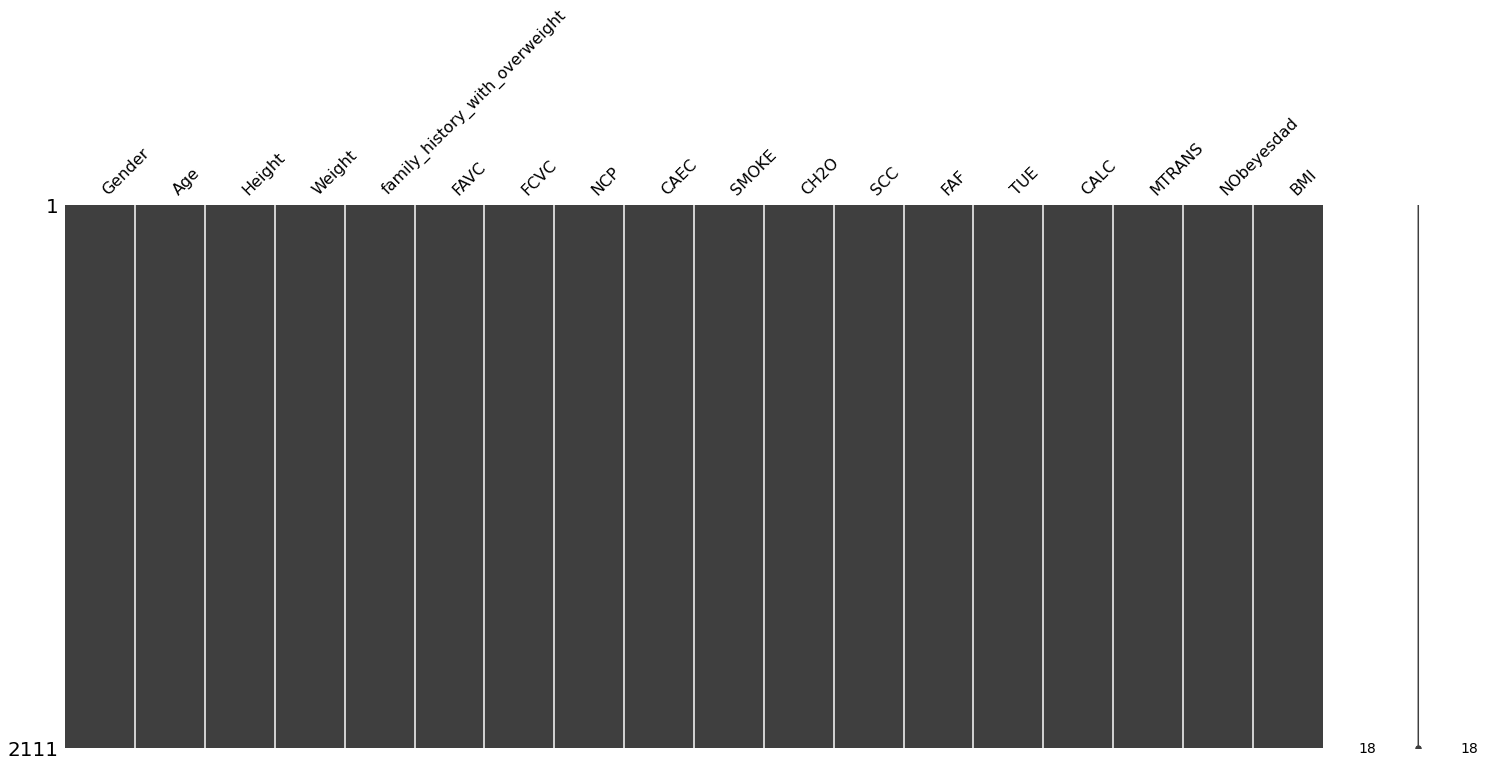

In [14]:
# Data Cleaning
# 1. Deal with Missing values
# 1.1 Ignore those tuples
# 1.2 Fill in the missing values 
obesity_df.isna().sum()
import missingno as msno
msno.matrix(obesity_df)
# 2. Deal with noisy data
# 2.1 Binning using cut and qcut
cat_columns = obesity_df.select_dtypes(['category']).columns



In [15]:
# function number_of_outliers for checking the number of outliers in the dataset
def number_of_outliers(df):
    
    df = df.select_dtypes(exclude = 'object')
    
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

number_of_outliers(obesity_df)

Gender                              0
Age                               160
Height                              1
Weight                              1
family_history_with_overweight    385
FAVC                              245
FCVC                                0
NCP                               579
CAEC                              346
SMOKE                              44
CH2O                                0
SCC                                96
FAF                                 0
TUE                                 0
CALC                                1
MTRANS                            531
NObeyesdad                          0
BMI                                 0
dtype: int64

In [16]:
import pandas as pd

def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[(df[column_name] > lower_bound) & (df[column_name] < upper_bound)]

In [17]:
obesity_df = remove_outliers(obesity_df, 'Height')
obesity_df = remove_outliers(obesity_df, 'Weight')

<AxesSubplot:>

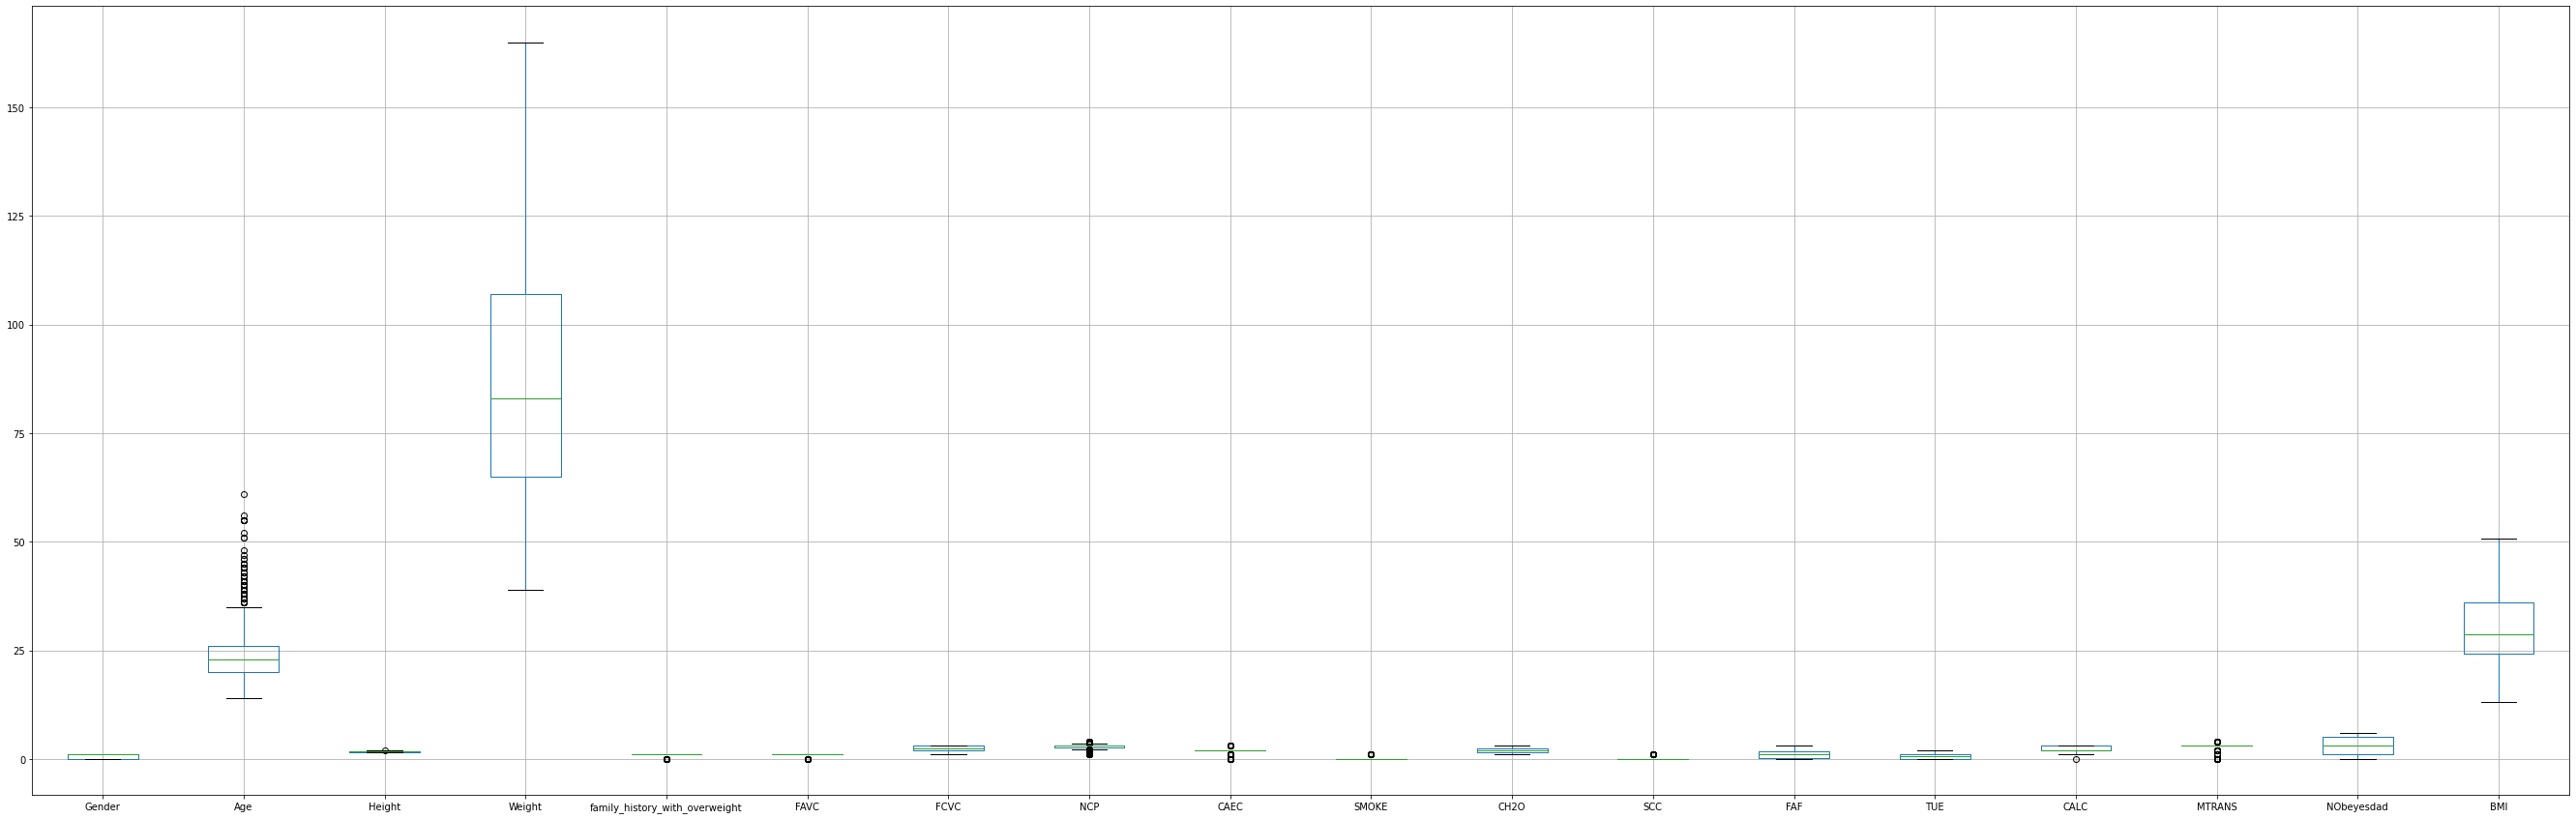

In [18]:
obesity_df.boxplot(figsize=(47,15))

In [19]:
#sns.boxplot(obesity_df["MTRANS"],obesity_df["NObeyesdad"])
#plt.show()

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>],
       [<AxesSubplot:title={'center':'family_history_with_overweight'}>,
        <AxesSubplot:title={'center':'FAVC'}>,
        <AxesSubplot:title={'center':'FCVC'}>,
        <AxesSubplot:title={'center':'NCP'}>],
       [<AxesSubplot:title={'center':'CAEC'}>,
        <AxesSubplot:title={'center':'SMOKE'}>,
        <AxesSubplot:title={'center':'CH2O'}>,
        <AxesSubplot:title={'center':'SCC'}>],
       [<AxesSubplot:title={'center':'FAF'}>,
        <AxesSubplot:title={'center':'TUE'}>,
        <AxesSubplot:title={'center':'CALC'}>,
        <AxesSubplot:title={'center':'MTRANS'}>],
       [<AxesSubplot:title={'center':'NObeyesdad'}>,
        <AxesSubplot:title={'center':'BMI'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

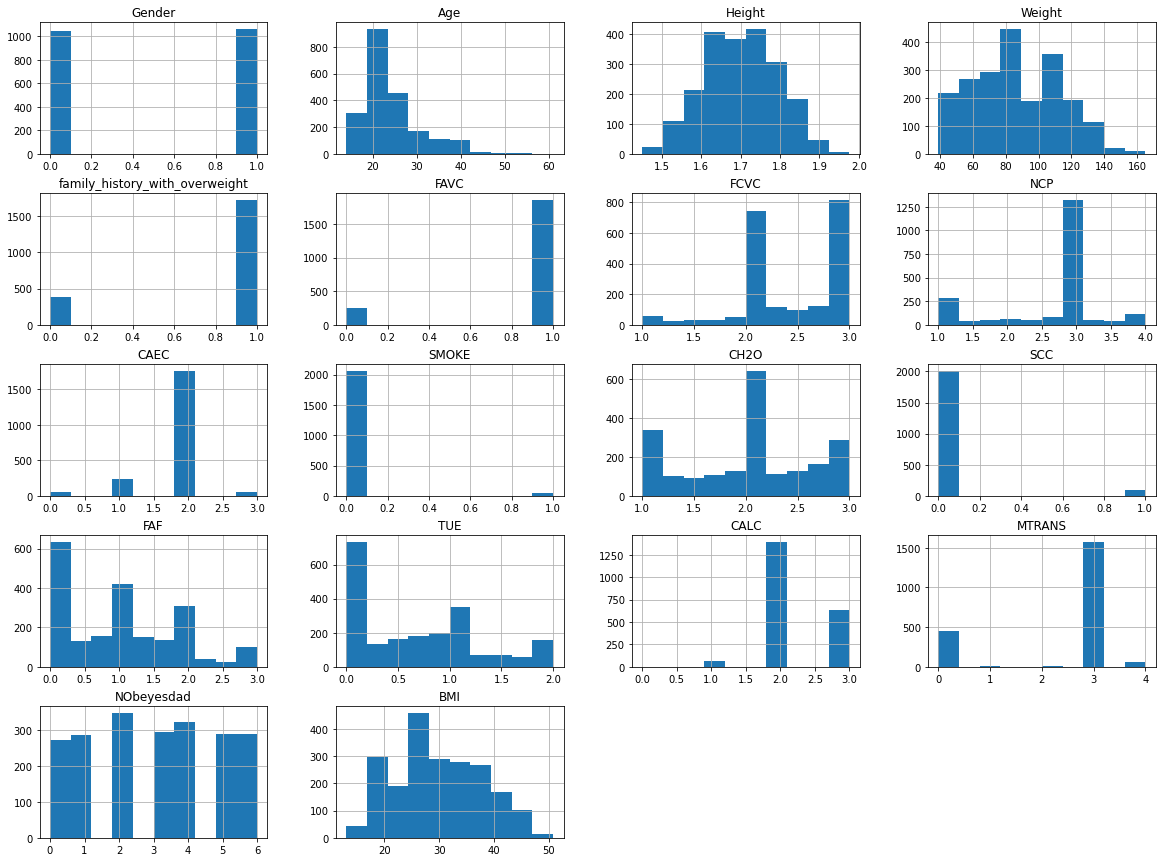

In [20]:
#(part 4) For all columns, visualize distribution of the data using histogram. 
#Comment on the data’s modality (i.e., bimodal, trimodal, etc.)
obesity_df.hist(figsize=(20,15)) 

In [21]:
obesity_df.dtypes


Gender                               int8
Age                                 int64
Height                            float64
Weight                              int64
family_history_with_overweight       int8
FAVC                                 int8
FCVC                              float64
NCP                               float64
CAEC                                 int8
SMOKE                                int8
CH2O                              float64
SCC                                  int8
FAF                               float64
TUE                               float64
CALC                                 int8
MTRANS                               int8
NObeyesdad                           int8
BMI                               float64
dtype: object

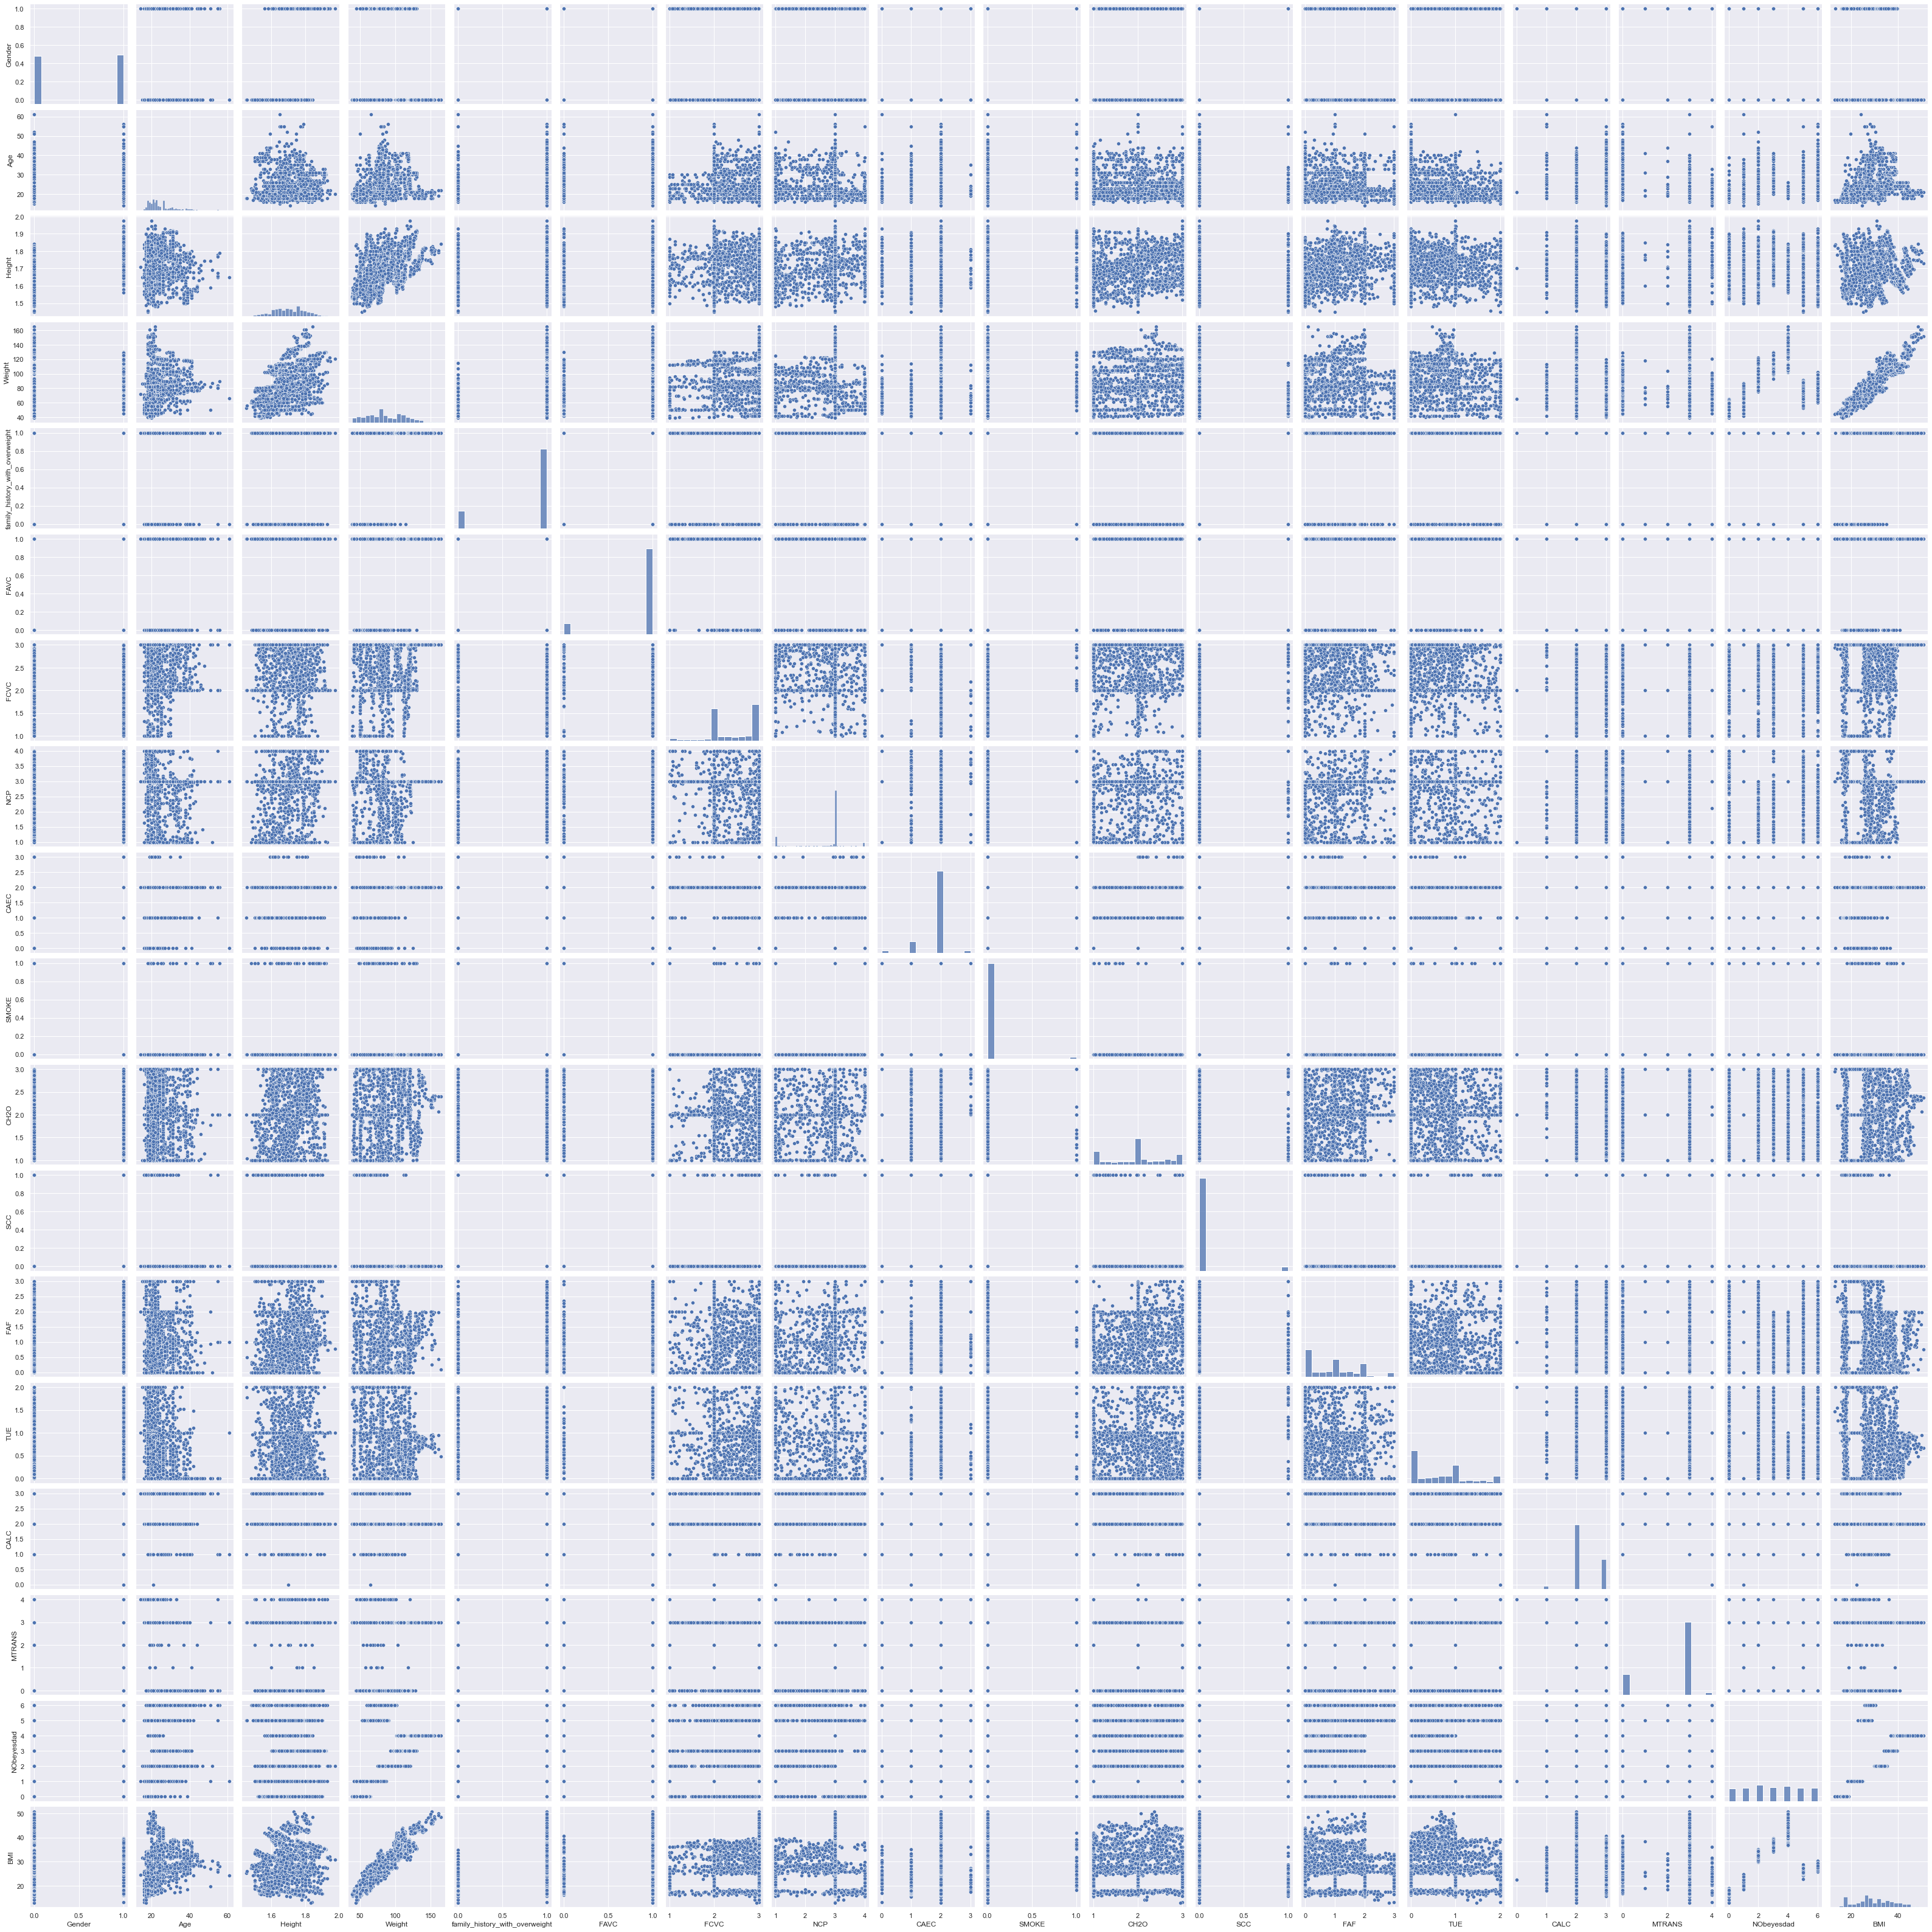

In [22]:
import seaborn as sns

sns.set()
sns.pairplot(obesity_df)

In [23]:
corr_matrix = obesity_df.corr()
corr_matrix

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
Gender,1.000000,0.049506,0.618293,0.159675,0.102128,0.064628,-0.274891,0.067258,0.094737,0.044856,0.107294,-0.102479,0.189216,0.016753,0.008109,-0.138090,0.024930,-0.054425
Age,0.049506,1.000000,-0.024451,0.206189,0.205961,0.063705,0.017157,-0.043639,0.082406,0.091271,-0.045133,-0.116244,-0.144699,-0.296302,-0.046013,-0.600446,0.235840,0.246978
Height,0.618293,-0.024451,1.000000,0.460783,0.247352,0.178066,-0.038068,0.243476,0.056421,0.055993,0.211840,-0.133646,0.294675,0.050790,-0.128937,-0.074977,0.039409,0.129850
Weight,0.159675,0.206189,0.460783,1.000000,0.497083,0.272333,0.216252,0.106912,0.295274,0.026144,0.199790,-0.201966,-0.053556,-0.073141,-0.206372,0.003634,0.388363,0.935085
family_history_with_overweight,0.102128,0.205961,0.247352,0.497083,1.000000,0.207908,0.040326,0.071202,0.171885,0.017453,0.147184,-0.185348,-0.056955,0.022697,0.036918,-0.101788,0.313743,0.483653
FAVC,0.064628,0.063705,0.178066,0.272333,0.207908,1.000000,-0.027349,-0.007140,0.151764,-0.050613,0.009450,-0.190599,-0.108235,0.068238,-0.089358,-0.069986,0.044593,0.246001
FCVC,-0.274891,0.017157,-0.038068,0.216252,0.040326,-0.027349,1.000000,0.042179,-0.055476,0.014347,0.069142,0.071916,0.019349,-0.101274,-0.060740,0.064706,0.018079,0.262976
NCP,0.067258,-0.043639,0.243476,0.106912,0.071202,-0.007140,0.042179,1.000000,-0.097138,0.007868,0.056820,-0.015542,0.129335,0.036118,-0.071562,-0.054062,-0.092632,0.039505
CAEC,0.094737,0.082406,0.056421,0.295274,0.171885,0.151764,-0.055476,-0.097138,1.000000,-0.055938,0.148798,-0.110283,-0.029262,-0.047242,-0.049204,-0.047371,0.328287,0.317847
SMOKE,0.044856,0.091271,0.055993,0.026144,0.017453,-0.050613,0.014347,0.007868,-0.055938,1.000000,-0.031904,0.047703,0.011299,0.017694,-0.082555,-0.010633,-0.023261,-0.000630


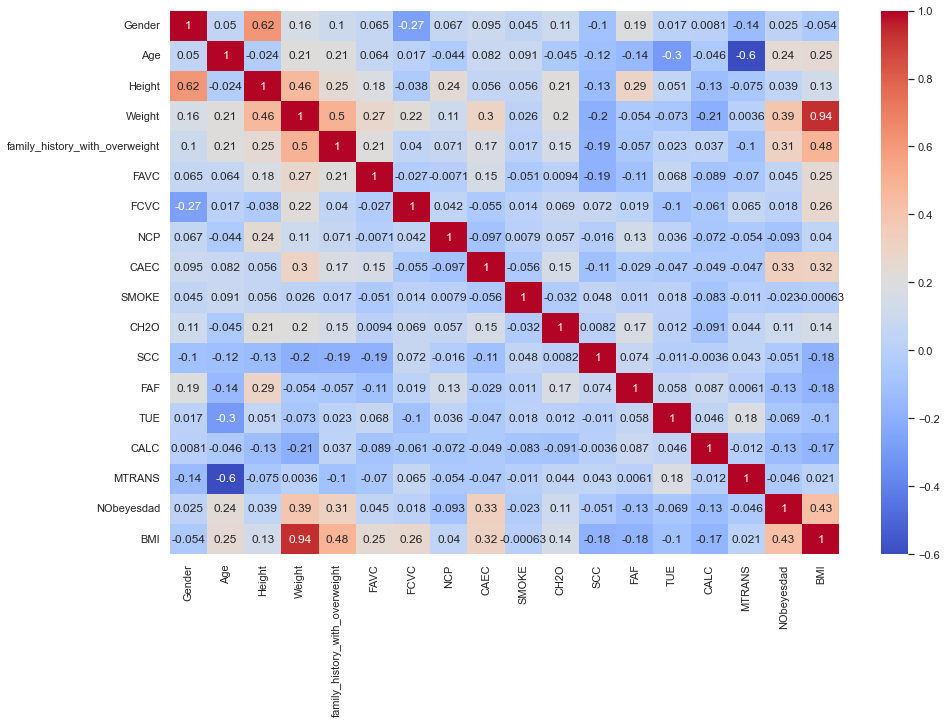

In [24]:
# Visualize the correlation matrix as a heatmap
fig, ax = plt.subplots(figsize=(15, 10))

# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)

# Show the plot
plt.show()


In [25]:
from pandas import *
import numpy as np
from scipy.stats.stats import pearsonr
import itertools

correlations = {}
columns = obesity_df.columns.tolist()

for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + '__' + col_b] = pearsonr(obesity_df.loc[:, col_a], obesity_df.loc[:, col_b])

result = DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']

print(result.sort_index())


                                                 PCC       p-value
Age__BMI                                    0.246978  1.118187e-30
Age__CAEC                                   0.082406  1.514885e-04
Age__CALC                                  -0.046013  3.460487e-02
Age__CH2O                                  -0.045133  3.821805e-02
Age__FAF                                   -0.144699  2.449541e-11
...                                              ...           ...
family_history_with_overweight__NCP         0.071202  1.067622e-03
family_history_with_overweight__NObeyesdad  0.313743  2.143981e-49
family_history_with_overweight__SCC        -0.185348  9.381451e-18
family_history_with_overweight__SMOKE       0.017453  4.230803e-01
family_history_with_overweight__TUE         0.022697  2.974730e-01

[153 rows x 2 columns]


## Project part 3: Regression
Since the target column "NObeyesdad" is categorical column. So we are considering 'Weight' column as target column because it has continuous values. We are taking 6 independent variables with higher correlation coefficient which are as follows:

['Gender', 'Age', 'Height', 'family_history_with_overweight','CAEC','NObeyesdad']

Now, we will one by one perform linear regression and calculate R2 score for each independent variables.

R2 score:  0.02515919296699831


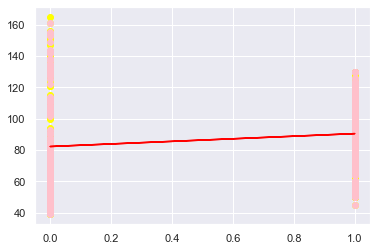

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = obesity_df['Gender'].values.reshape(-1, 1)
y = obesity_df['Weight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model on the training set
reg = LinearRegression().fit(X_train, y_train)

r2 = reg.score(X_train, y_train)
print("R2 score: ",r2)


# Predict on the testing set
y_pred = reg.predict(X_test)

# Plot the scatter plot and the regression line
plt.scatter(X_train, y_train, color='yellow')
plt.scatter(X_test, y_test, color='pink')
plt.plot(X_test, y_pred, color='red')
plt.show()

R2 score:  0.21193854413467117


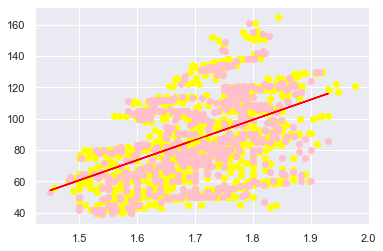

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = obesity_df['Height'].values.reshape(-1, 1)
y = obesity_df['Weight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model on the training set
reg = LinearRegression().fit(X_train, y_train)

r2 = reg.score(X_train, y_train)
print("R2 score: ",r2)


# Predict on the testing set
y_pred = reg.predict(X_test)

# Plot the scatter plot and the regression line
plt.scatter(X_train, y_train, color='yellow')
plt.scatter(X_test, y_test, color='pink')
plt.plot(X_test, y_pred, color='red')
plt.show()

R2 score:  0.24904556331256467


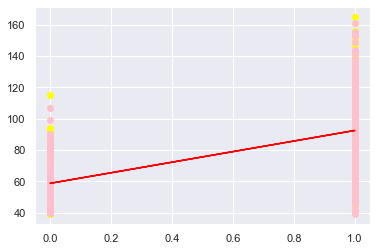

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = obesity_df['family_history_with_overweight'].values.reshape(-1, 1)
y = obesity_df['Weight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model on the training set
reg = LinearRegression().fit(X_train, y_train)

r2 = reg.score(X_train, y_train)
print("R2 score: ",r2)


# Predict on the testing set
y_pred = reg.predict(X_test)

# Plot the scatter plot and the regression line
plt.scatter(X_train, y_train, color='yellow')
plt.scatter(X_test, y_test, color='pink')
plt.plot(X_test, y_pred, color='red')
plt.show()

R2 score:  0.04357135578756477


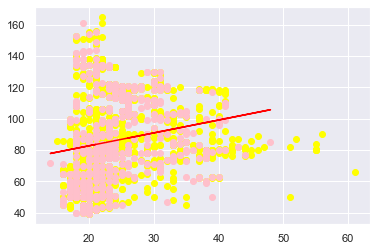

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = obesity_df['Age'].values.reshape(-1, 1)
y = obesity_df['Weight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model on the training set
reg = LinearRegression().fit(X_train, y_train)

r2 = reg.score(X_train, y_train)
print("R2 score: ",r2)


# Predict on the testing set
y_pred = reg.predict(X_test)

# Plot the scatter plot and the regression line
plt.scatter(X_train, y_train, color='yellow')
plt.scatter(X_test, y_test, color='pink')
plt.plot(X_test, y_pred, color='red')
plt.show()

R2 score:  0.08582829895786082


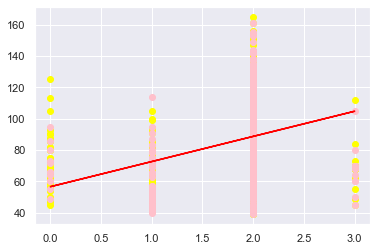

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = obesity_df['CAEC'].values.reshape(-1, 1)
y = obesity_df['Weight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model on the training set
reg = LinearRegression().fit(X_train, y_train)

r2 = reg.score(X_train, y_train)
print("R2 score: ",r2)


# Predict on the testing set
y_pred = reg.predict(X_test)

# Plot the scatter plot and the regression line
plt.scatter(X_train, y_train, color='yellow')
plt.scatter(X_test, y_test, color='pink')
plt.plot(X_test, y_pred, color='red')
plt.show()

R2 score:  0.14805705464534735


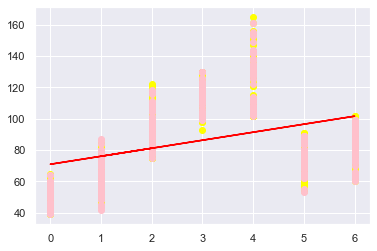

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = obesity_df['NObeyesdad'].values.reshape(-1, 1)
y = obesity_df['Weight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model on the training set
reg = LinearRegression().fit(X_train, y_train)

r2 = reg.score(X_train, y_train)
print("R2 score: ",r2)


# Predict on the testing set
y_pred = reg.predict(X_test)

# Plot the scatter plot and the regression line
plt.scatter(X_train, y_train, color='yellow')
plt.scatter(X_test, y_test, color='pink')
plt.plot(X_test, y_pred, color='red')
plt.show()

## Summary
- The correlation coefficient is the statistical concept, which measures the strength and direction of the linear relationship between two variables. It ranges from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.
- The r2 score is the coefficient of determination and measures how well a model fits the data by calculating the proportion of variance. It ranges from 0 to 1, where 0 indicates that the model explains none of the variability of the data, and 1 represents that the model explains all of the variability of the data.
- The correlation coefficient and the r2 score are related by R2= R*R. therefore, higher the absolute value of R(correlation coefficient) implies the higher value of r2.
- Since Weight and family_history_with_overweight column are highly correlated we noted that from the above experiment R2 score is also higher.
- Weight and Gender column has lower correlation coefficient therefore R2 score is also very low for that variable.

## Multiple linear regression
We have also performed multiple linear regression for Weight vs all the variables and calculated the R2 score 

Number of training samples: 1687
Number of training target values: 1687
Number of testing samples: 422
Number of testing target values: 422
Mean Squared Error:  302.5967874467763
R2 score for train:  0.5761417988957374
R2 score for test:  0.573546612056367


/Users/sonalidesarda/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

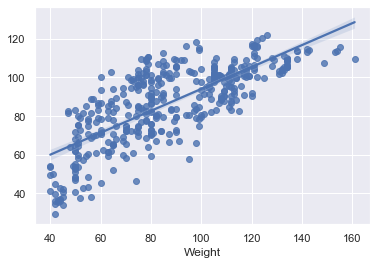

In [139]:
 # Multiple linear regression
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Separate the features from the target variable
X = obesity_df[['Gender', 'Age', 'Height', 'family_history_with_overweight','FAVC','FCVC', 'NCP', 'CAEC', 'SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS','NObeyesdad']]
y = obesity_df['Weight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check that the number of samples is consistent
print('Number of training samples:', len(X_train))
print('Number of training target values:', len(y_train))
print('Number of testing samples:', len(X_test))
print('Number of testing target values:', len(y_test))


# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the performance of the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

print("R2 score for train: ",model.score(X_train, y_train))
print("R2 score for test: ",r2_score(y_test, y_pred))

sns.regplot(y_test,y_pred)

## Normality Test - to check if the residuals follow Normal distribution.
In linear regression, a normality test is used to check whether the residuals (the difference between the predicted and actual values) are normally distributed. If the residuals are not normally distributed, it can impact the accuracy and validity of the regression model's results. To check for normality, statistical tests like the Shapiro-Wilk test or visual inspection through a histogram or density plot can be used.

/Users/sonalidesarda/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

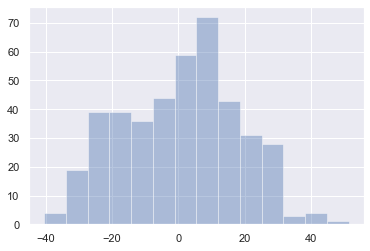

In [140]:
overall = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residual': (y_test-y_pred)})
overall

sns.distplot(x= overall['Residual'], kde= False)

In [137]:
from sklearn import model_selection, tree, preprocessing, metrics, linear_model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 14.442540601443227
Mean Squared Error: 302.5967874467763
Root Mean Squared Error: 17.395309351856216
